# ML HW1 | Supervised Learning | KNN
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

## Import Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

## Set directory

In [30]:
directory = "/Users/michaelpecorino/Documents/GitLab/ncaa/"

## Load inputs

In [31]:
ncaa_all = pd.read_csv(directory + "ncaa_all.csv")
train = pd.read_csv(directory + "ncaa_train.csv")
valid = pd.read_csv(directory + "ncaa_valid.csv")
test = pd.read_csv(directory + "ncaa_test.csv")

## Define features and response variable

### Features

In [32]:
features = ["game_win_perc_prop", 
            "game_starters_total_minutes_prop", "game_starters_prop_minutes_prop", "game_player_pts_10plus_prop",
            "game_player_pts_15plus_prop", "game_player_pts_16plus_prop", "game_player_pts_17plus_prop",
            "game_player_pts_18plus_prop", "game_player_pts_19plus_prop", "game_player_pts_20plus_prop",
            "game_player_pts_21plus_prop", "game_player_pts_22plus_prop", "game_player_ast_3plus_prop",
            "game_player_ast_5plus_prop", "game_player_ast_7plus_prop",
            "game_player_orb_1plus_prop", "game_player_orb_2plus_prop", "game_player_orb_3plus_prop",
            "game_player_drb_5plus_prop", "game_player_drb_7plus_prop", "game_player_drb_10plus_prop",
            "game_gs_mean_prop", "game_gs_max_prop", "game_pos_prop", "game_pts_prop", "game_efficiency_prop",
            "game_fg_attempted_prop", "game_ft_attempted_prop", "game_ft_made_prop", "game_stl_prop",
            "game_tov_prop","game_stl_tov_ratio_diff", "game_stl_tov_ratio_prop", "game_blk_prop",
            "game_orb_prop", "game_drb_prop", "game_trb_prop", "game_ast_prop", "game_pf_diff", "game_pf_prop",
            "home_indicator.x", "neutral_indicator"]
ncaa_all_features = ncaa_all[features]
train_features = train[features]
valid_features = valid[features]
train_valid_features = train_features.append(valid_features)
test_features = test[features]

### Response variable

In [33]:
response_variable = "win_indicator"
ncaa_all_response = ncaa_all[response_variable]
train_response = train[response_variable]
valid_response = valid[response_variable]
train_valid_resposnse = train_response.append(valid_response)
test_response = test[response_variable]

## KNN

### Normalize

In [34]:
train_features_normalized = normalize(train_features)
valid_features_normalized = normalize(valid_features)

### Grid search

In [35]:
folds = set(train['fold'])
folds

{1, 2, 3, 4, 5}

In [27]:
knn_results = pd.DataFrame(columns = ['n_neighbor', 'weights', 'p',
                                      'fold', 'in_fold_accuracy', 'out_fold_accuracy'])

n_neighbors = [1, 5, 10, 15, 20, 25, 30]
for n_neighbor in n_neighbors:
    for weights in ['distance']:
        for p in [2]:
            for fold in folds:
            
                #Debugging
                #n_neighbors = 1
                #weights = "distance"
                #p = 2
                #fold = 1
        
                train_features_in_fold = train[train["fold"] != fold][features]
                train_features_in_fold = normalize(train_features_in_fold)
                train_response_in_fold = train[train["fold"] != fold][response_variable]

                test_features_out_fold = train[train["fold"] == fold][features]
                test_features_out_fold = normalize(test_features_out_fold)
                test_response_out_fold = train[train["fold"] == fold][response_variable]
                
                print("Modeling fold", fold, "with neighbors:", n_neighbors, ", weights:", weights, ", and minkowski parameter:", p)

                knn_model = KNeighborsClassifier(n_neighbors = n_neighbor,
                                                         weights = weights,
                                                         algorithm = 'auto',
                                                         leaf_size = 1,
                                                         p = p,
                                                         metric = 'minkowski',
                                                         metric_params = None,
                                                         n_jobs = 3
                                                        )

                knn_model.fit(train_features_in_fold, train_response_in_fold) 

                in_fold_accuracy = knn_model.score(train_features_in_fold, train_response_in_fold)
                out_fold_accuracy = knn_model.score(test_features_out_fold, test_response_out_fold)

                knn_results = knn_results.append({'n_neighbors': n_neighbor,
                                                  'weights': weights,
                                                  'p': p,
                                                  'fold': fold,
                                                  'in_fold_accuracy': in_fold_accuracy,
                                                  'out_fold_accuracy': out_fold_accuracy},
                                                ignore_index = True)
                print(knn_results, "\n")

Modeling fold 1 with neighbors: 1 , weights: distance , and minkowski parameter: 2
  n_neighbors   weights  p fold  in_fold_accuracy  out_fold_accuracy
0           1  distance  2    1          0.988346           0.587338 

Modeling fold 2 with neighbors: 1 , weights: distance , and minkowski parameter: 2
  n_neighbors   weights  p fold  in_fold_accuracy  out_fold_accuracy
0           1  distance  2    1          0.988346           0.587338
1           1  distance  2    2          0.988759           0.576526 

Modeling fold 3 with neighbors: 1 , weights: distance , and minkowski parameter: 2
  n_neighbors   weights  p fold  in_fold_accuracy  out_fold_accuracy
0           1  distance  2    1          0.988346           0.587338
1           1  distance  2    2          0.988759           0.576526
2           1  distance  2    3          0.987934           0.582921 

Modeling fold 4 with neighbors: 1 , weights: distance , and minkowski parameter: 2
  n_neighbors   weights  p fold  in_fold_

   n_neighbors   weights  p fold  in_fold_accuracy  out_fold_accuracy
0            1  distance  2    1          0.988346           0.587338
1            1  distance  2    2          0.988759           0.576526
2            1  distance  2    3          0.987934           0.582921
3            1  distance  2    4          0.988192           0.577764
4            1  distance  2    5          0.994998           0.588490
5            5  distance  2    1          0.995101           0.627140
6            5  distance  2    2          0.995411           0.622318
7            5  distance  2    3          0.987934           0.616337
8            5  distance  2    4          0.995050           0.624794
9            5  distance  2    5          0.989017           0.611180
10          10  distance  2    1          0.995101           0.644050
11          10  distance  2    2          0.995411           0.630982
12          10  distance  2    3          0.994998           0.634695
13          10  dist

   n_neighbors   weights  p fold  in_fold_accuracy  out_fold_accuracy
0            1  distance  2    1          0.988346           0.587338
1            1  distance  2    2          0.988759           0.576526
2            1  distance  2    3          0.987934           0.582921
3            1  distance  2    4          0.988192           0.577764
4            1  distance  2    5          0.994998           0.588490
5            5  distance  2    1          0.995101           0.627140
6            5  distance  2    2          0.995411           0.622318
7            5  distance  2    3          0.987934           0.616337
8            5  distance  2    4          0.995050           0.624794
9            5  distance  2    5          0.989017           0.611180
10          10  distance  2    1          0.995101           0.644050
11          10  distance  2    2          0.995411           0.630982
12          10  distance  2    3          0.994998           0.634695
13          10  dist

   n_neighbors   weights  p fold  in_fold_accuracy  out_fold_accuracy
0            1  distance  2    1          0.988346           0.587338
1            1  distance  2    2          0.988759           0.576526
2            1  distance  2    3          0.987934           0.582921
3            1  distance  2    4          0.988192           0.577764
4            1  distance  2    5          0.994998           0.588490
5            5  distance  2    1          0.995101           0.627140
6            5  distance  2    2          0.995411           0.622318
7            5  distance  2    3          0.987934           0.616337
8            5  distance  2    4          0.995050           0.624794
9            5  distance  2    5          0.989017           0.611180
10          10  distance  2    1          0.995101           0.644050
11          10  distance  2    2          0.995411           0.630982
12          10  distance  2    3          0.994998           0.634695
13          10  dist

   n_neighbors   weights  p fold  in_fold_accuracy  out_fold_accuracy
0            1  distance  2    1          0.988346           0.587338
1            1  distance  2    2          0.988759           0.576526
2            1  distance  2    3          0.987934           0.582921
3            1  distance  2    4          0.988192           0.577764
4            1  distance  2    5          0.994998           0.588490
5            5  distance  2    1          0.995101           0.627140
6            5  distance  2    2          0.995411           0.622318
7            5  distance  2    3          0.987934           0.616337
8            5  distance  2    4          0.995050           0.624794
9            5  distance  2    5          0.989017           0.611180
10          10  distance  2    1          0.995101           0.644050
11          10  distance  2    2          0.995411           0.630982
12          10  distance  2    3          0.994998           0.634695
13          10  dist

   n_neighbors   weights  p fold  in_fold_accuracy  out_fold_accuracy
0            1  distance  2    1          0.988346           0.587338
1            1  distance  2    2          0.988759           0.576526
2            1  distance  2    3          0.987934           0.582921
3            1  distance  2    4          0.988192           0.577764
4            1  distance  2    5          0.994998           0.588490
5            5  distance  2    1          0.995101           0.627140
6            5  distance  2    2          0.995411           0.622318
7            5  distance  2    3          0.987934           0.616337
8            5  distance  2    4          0.995050           0.624794
9            5  distance  2    5          0.989017           0.611180
10          10  distance  2    1          0.995101           0.644050
11          10  distance  2    2          0.995411           0.630982
12          10  distance  2    3          0.994998           0.634695
13          10  dist

### Output

In [21]:
knn_results = knn_results.sort_values(by = ['out_fold_accuracy'], ascending = False)
knn_results.to_csv(directory + "knn_grid_search.csv")
knn_results

,Unnamed: 0,n_neighbors,weights,p,fold,in_fold_accuracy,out_fold_accuracy
0,30,30,distance,2,1,0.995050,0.667767
1,31,30,distance,2,2,0.995411,0.665429
2,26,25,distance,2,2,0.995411,0.662335
3,20,20,distance,2,1,0.995050,0.661580
4,15,15,distance,2,1,0.995101,0.660961
5,25,25,distance,2,1,0.995050,0.659724
6,24,20,distance,2,5,0.995101,0.659035
7,23,20,distance,2,4,0.994947,0.657178
9,28,25,distance,2,4,0.994947,0.656559
8,34,30,distance,2,5,0.995101,0.656559


### Get mean accuracy across the folds

In [36]:
knn_results = pd.read_csv(directory + "knn_grid_search.csv")
knn_results


,Unnamed: 0,Unnamed: 0.1,n_neighbors,weights,p,fold,in_fold_accuracy,out_fold_accuracy
0,0,30,30,distance,2,1,0.995050,0.667767
1,1,31,30,distance,2,2,0.995411,0.665429
2,2,26,25,distance,2,2,0.995411,0.662335
3,3,20,20,distance,2,1,0.995050,0.661580
4,4,15,15,distance,2,1,0.995101,0.660961
5,5,25,25,distance,2,1,0.995050,0.659724
6,6,24,20,distance,2,5,0.995101,0.659035
7,7,23,20,distance,2,4,0.994947,0.657178
8,9,28,25,distance,2,4,0.994947,0.656559
9,8,34,30,distance,2,5,0.995101,0.656559


In [37]:
in_fold_cv_summary = knn_results.groupby(['n_neighbors', 'weights', 'p'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['mean'], ascending = False)
out_fold_cv_summary = knn_results.groupby(['n_neighbors', 'weights', 'p'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['mean'], ascending = False)

print(out_fold_cv_summary)

                            mean
n_neighbors weights  p          
30          distance 2  0.659378
25          distance 2  0.656738
20          distance 2  0.656408
15          distance 2  0.649890
10          distance 2  0.636153
5           distance 2  0.620354
1           distance 2  0.582608


### Get the optimal hyperparameters

In [38]:
n_neighbors_opt = 30
weights_opt = "distance"
p_opt = 2

### Train a final model with the optimal hyperparameters

In [39]:
knn_model = KNeighborsClassifier(n_neighbors = n_neighbors_opt,
                                 weights = weights_opt,
                                 algorithm = 'auto',
                                 leaf_size = 1,
                                 p = p_opt,
                                 metric = 'minkowski',
                                 metric_params = None,
                                 n_jobs = 3)

knn_model.fit(normalize(train_features), train_response) 

print("KNN accuracy on training data: ",
      knn_model.score(normalize(train_features), train_response))
print("KNN accuracy on validation data: ",
      knn_model.score(normalize(valid_features), valid_response))
print("KNN accuracy on test data: ",
      knn_model.score(normalize(test_features), test_response))

KNN accuracy on training data:  0.9951734664411535
KNN accuracy on validation data:  0.6899919362064331
KNN accuracy on test data:  0.6849796174349326


### Learning curve

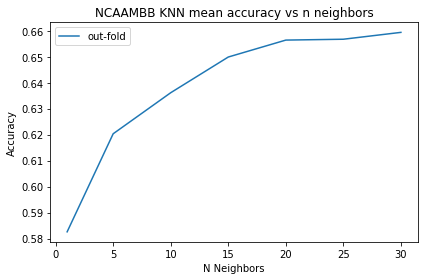

In [40]:
in_fold_neighbor_summary = knn_results.groupby(['n_neighbors'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['n_neighbors'], ascending = True)
out_fold_neighbor_summary = knn_results.groupby(['n_neighbors'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['n_neighbors'], ascending = True)

fig, ax = plt.subplots()

ax.set_xlabel("N Neighbors")
ax.set_ylabel("Accuracy")
ax.set_title("NCAAMBB KNN mean accuracy vs n neighbors")
#ax.plot(n_neighbors,
#        in_fold_neighbor_summary['mean'],
#        label = "in-fold")
ax.plot(n_neighbors,
        out_fold_neighbor_summary['mean'],
        label = "out-fold")
ax.legend()

fig.tight_layout()

## Training size

### Normalize

In [41]:
cbb_all_features_features_normalized = normalize(ncaa_all_features)

In [42]:
knn_train_sizes = []
knn_train_size_train_scores = []
knn_train_size_test_scores = []
knn_train_size_train_time = []
knn_train_size_score_time = []

iter = 0
train_sizes = np.linspace(.05,.95, 19)
for train_size in train_sizes:
    (train_features_train_size, test_features_train_size,
    train_response_train_size, test_response_train_size) = train_test_split(ncaa_all_features,
                                                                            ncaa_all_response,
                                                                            train_size = train_size,
                                                                            random_state = 28)
    (train_features_train_size, test_features_train_size,
    train_response_train_size, test_response_train_size) = train_test_split(ncaa_all_features,
                                                                            ncaa_all_response,
                                                                            train_size = train_size,
                                                                            random_state = 28)
    
    iter = iter + 1
    print("iter:", iter,
          " | train size:", train_size)
    knn_train_size = KNeighborsClassifier(n_neighbors = n_neighbors_opt,
                                          weights = weights_opt,
                                          algorithm = 'auto',
                                          leaf_size = 1,
                                          p = p_opt,
                                          metric = 'minkowski',
                                          metric_params = None,
                                          n_jobs = 3)
    
    start = time.time()
    knn_train_size.fit(train_features_train_size, train_response_train_size)
    end = time.time()
    knn_train_size_train_time.append(end - start)

    knn_train_sizes.append(knn_train_size)
    
    start = time.time()
    knn_train_size_train_scores.append(knn_train_size.score(train_features_train_size, train_response_train_size)) 
    end = time.time()
    knn_train_size_score_time.append(end - start)

    knn_train_size_test_scores.append(knn_train_size.score(test_features_train_size, test_response_train_size))

iter: 1  | train size: 0.05
iter: 2  | train size: 0.1
iter: 3  | train size: 0.15
iter: 4  | train size: 0.2
iter: 5  | train size: 0.25
iter: 6  | train size: 0.3
iter: 7  | train size: 0.35
iter: 8  | train size: 0.39999999999999997
iter: 9  | train size: 0.44999999999999996
iter: 10  | train size: 0.49999999999999994
iter: 11  | train size: 0.5499999999999999
iter: 12  | train size: 0.6
iter: 13  | train size: 0.65
iter: 14  | train size: 0.7
iter: 15  | train size: 0.75
iter: 16  | train size: 0.7999999999999999
iter: 17  | train size: 0.85
iter: 18  | train size: 0.9
iter: 19  | train size: 0.95


### Plotting the learning curve by training size, for the optimal hyperparameters

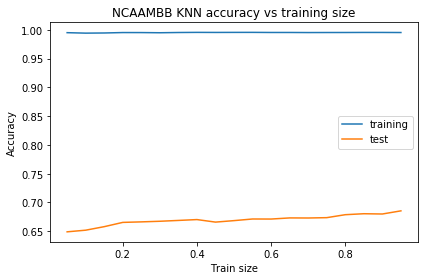

In [46]:
fig, ax = plt.subplots()

ax.set_xlabel("Train size")
ax.set_ylabel("Accuracy")
ax.set_title("NCAAMBB KNN accuracy vs training size")
ax.plot(train_sizes, knn_train_size_train_scores, label = "training",
        #drawstyle = "steps-post"
       )
ax.plot(train_sizes, knn_train_size_test_scores, label = "test",
        #drawstyle = "steps-post"
       )
ax.legend()

fig.tight_layout()

###  Plotting the model fitting time as a function of the training size

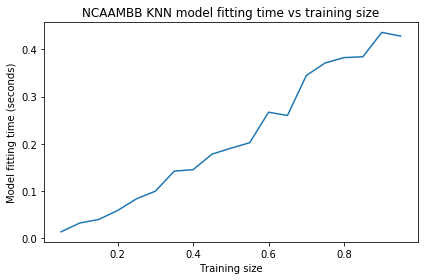

In [47]:
fig, ax = plt.subplots()

ax.set_xlabel("Training size")
ax.set_ylabel("Model fitting time (seconds)")
ax.set_title("NCAAMBB KNN model fitting time vs training size")
ax.plot(train_sizes, knn_train_size_train_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()

### Plotting the model scoring time as a function of the training size

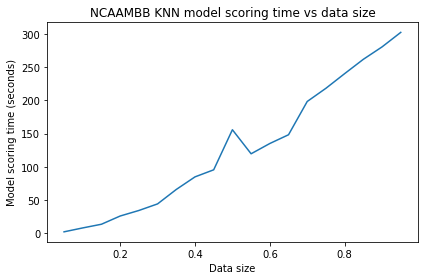

In [48]:
fig, ax = plt.subplots()

ax.set_xlabel("Data size")
ax.set_ylabel("Model scoring time (seconds)")
ax.set_title("NCAAMBB KNN model scoring time vs data size")
ax.plot(train_sizes, knn_train_size_score_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()